<a href="https://colab.research.google.com/github/Charithareddy22/charithareddy/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Load the Dataset
file_path="/content/segmentation_data.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
#Display the column names
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

Text(0, 0.5, 'Income')

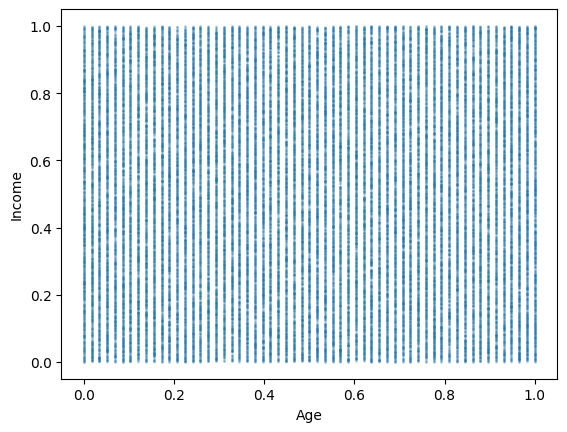

In [ ]:
#Creating a scatter plot
plt.scatter(df.Age,df['Income'],alpha=0.1,s=1)
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000000,0,0,27,0,302122,1,1
1,100000001,1,0,45,3,228035,0,0
2,100000002,1,1,37,0,126914,2,2
3,100000003,1,0,75,1,58989,2,0
4,100000004,1,1,75,3,156718,1,2
...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0
89996,100089996,0,1,56,2,74230,2,0
89997,100089997,1,1,39,2,61334,2,1
89998,100089998,0,1,55,2,178610,1,0


In [ ]:
#Apply KMeans
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 1, ..., 1, 0, 2], dtype=int32)

In [ ]:
#Adds new columns called cluster
df['cluster']=y_predicted
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000000,0,0,27,0,302122,1,1,2
1,100000001,1,0,45,3,228035,0,0,2
2,100000002,1,1,37,0,126914,2,2,1
3,100000003,1,0,75,1,58989,2,0,1
4,100000004,1,1,75,3,156718,1,2,0


In [ ]:
km.cluster_centers_

array([[4.69069471e+01, 1.73848885e+05],
       [4.69537001e+01, 8.19133354e+04],
       [4.70297237e+01, 2.64479112e+05]])

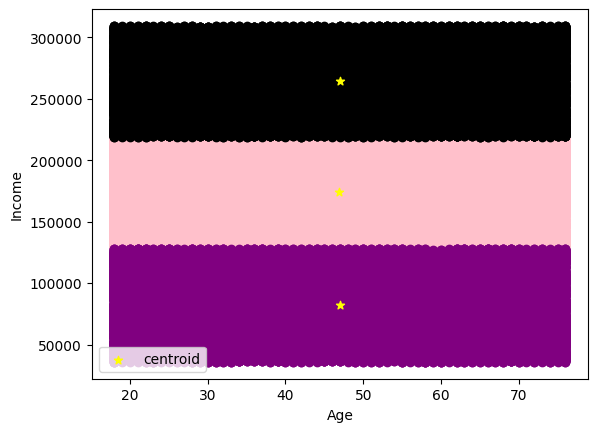

In [ ]:
#seperate data based on clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='pink')
plt.scatter(df2.Age,df2['Income'],color='purple')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [ ]:
#Feature scaling
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000000,0,0,0.155172,0,0.973528,1,1,2
1,100000001,1,0,0.465517,3,0.702674,0,0,2
2,100000002,1,1,0.327586,0,0.332986,2,2,1
3,100000003,1,0,0.982759,1,0.084660,2,0,1
4,100000004,1,1,0.982759,3,0.441946,1,2,0
